In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define your colors
COLOURS = {
    "monoPreFLMR": "#0052CC",
    "ModPreFLMR": "#36B37E",
    "monoBLIP-2": "#6554C0",
}

# Set the font family and font sizes
plt.rcParams['font.family'] = 'Avenir'
# plt.rcParams['axes.titlesize'] = 20  # Title font size
# plt.rcParams['axes.labelsize'] = 16  # Axis label font size
# plt.rcParams['xtick.labelsize'] = 14  # X-tick label font size
# plt.rcParams['ytick.labelsize'] = 14  # Y-tick label font size
# plt.rcParams['legend.fontsize'] = 14  # Legend font size



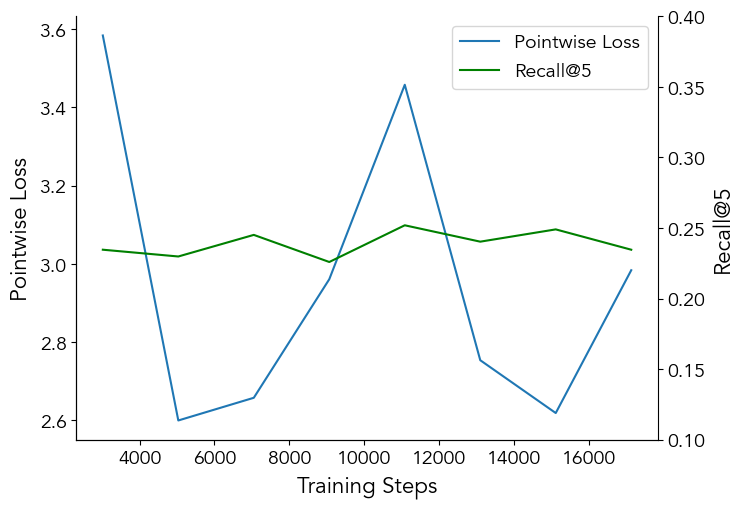

In [101]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
data = {
    'Steps': [3021, 5035, 7049, 9063, 11077, 13091, 15105, 17119],
    'Training Loss': [0.0908, 0.0644, 0.0598, 0.0457, 0.0442, 0.0432, 0.0313, 0.0303],
    'Validation Avg Loss': [3.584, 2.600, 2.658, 2.961, 3.458, 2.754, 2.619, 2.984],
    'Recall': [0.2346, 0.2298, 0.2451, 0.2259, 0.2519, 0.2403, 0.2490, 0.2346]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the figure and axes
fig, ax3 = plt.subplots(figsize=(7.5, 5.5))

# Plot the validation average loss on the primary y-axis
sns.lineplot(data=df, x='Steps', y='Validation Avg Loss', ax=ax3, label='Pointwise Loss')

# Set up the secondary axis for Recall
ax4 = ax3.twinx()
sns.lineplot(data=df, x='Steps', y='Recall', ax=ax4, color='green', label='Recall@5')

# Set labels and title
ax3.set_xlabel('Training Steps')
ax3.set_ylabel('Pointwise Loss')
ax4.set_ylabel('Recall@5')

# Customize the secondary y-axis for Recall
ax4.set_ylim(0.1, 0.4)

# Combine handles and labels from both axes
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()

# Create a single legend for both lines
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Remove the legend from the second axis to avoid duplication
ax4.get_legend().remove()

# Customizing the plot
sns.despine(ax=ax3, top=True, right=False)  # Remove the top spine only, keep the right spine for the secondary axis
sns.despine(ax=ax4, top=True, right=False)  # Remove the top spine only for the secondary axis

# Remove the top border from both axes
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)

# Remove the right border of the primary axis but keep it for the secondary axis
ax3.spines['right'].set_visible(False)

# Disable the grid
ax3.grid(False)

# Save the plot with higher quality
plt.savefig("images/val_vs_recall.png", dpi=600)



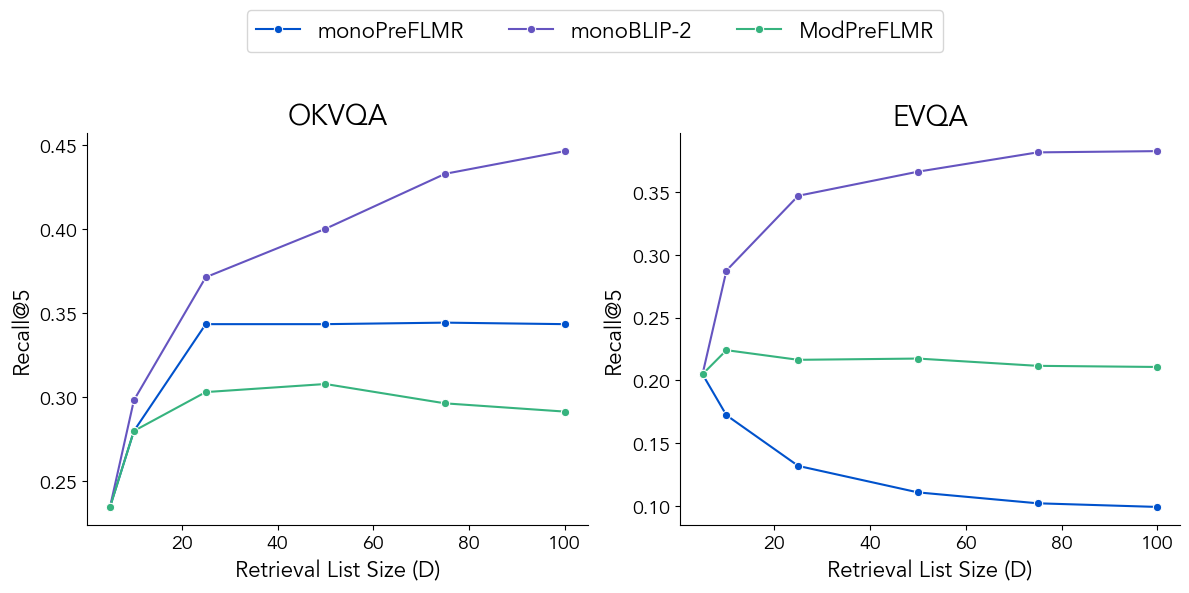

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

COLOURS = {
    "monoPreFLMR": "#0052CC",
    "ModPreFLMR": "#36B37E",
    "monoBLIP-2": "#6554C0",
}

data_okvqa = {
    'D': [5, 10, 25, 50, 75, 100],
    'monoPreFLMR': [0.2346, 0.2798, 0.3433, 0.3433, 0.3442, 0.3433],
    'monoBLIP-2': [0.2346, 0.2981, 0.3712, 0.4000, 0.4327, 0.4462],
    'ModPreFLMR': [0.2346, 0.2798, 0.3029, 0.3077, 0.2962, 0.2913]
}

data_evqa = {
    'D': [5, 10, 25, 50, 75, 100],
    'monoPreFLMR': [0.2048, 0.1721, 0.1317, 0.1106, 0.1019, 0.0990],
    'monoBLIP-2': [0.2048, 0.2875, 0.3471, 0.3663, 0.3817, 0.3827],
    'ModPreFLMR': [0.2048, 0.2240, 0.2163, 0.2173, 0.2115, 0.2106]
}


# Convert to DataFrame
df_okvqa = pd.DataFrame(data_okvqa)
df_evqa = pd.DataFrame(data_evqa)

# Melt the data for seaborn
df_okvqa_melt = df_okvqa.melt('D', var_name='Model', value_name='Recall@5')
df_evqa_melt = df_evqa.melt('D', var_name='Model', value_name='Recall@5')

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Plot for OKVQA
sns.lineplot(ax=axes[0], data=df_okvqa_melt, x='D', y='Recall@5', hue='Model', marker='o', palette=COLOURS)
axes[0].set_title('OKVQA', fontsize=20)
axes[0].set_xlabel('Retrieval List Size (D)', fontsize=16)
axes[0].set_ylabel('Recall@5', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].legend_.remove()  # Remove the individual legend
axes[0].grid(False)

# Plot for EVQA
sns.lineplot(ax=axes[1], data=df_evqa_melt, x='D', y='Recall@5', hue='Model', marker='o', palette=COLOURS)
axes[1].set_title('EVQA', fontsize=20)
axes[1].set_xlabel('Retrieval List Size (D)', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].legend_.remove()  # Remove the individual legend
axes[1].grid(False)

# Add a single legend for both plots
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=16, title_fontsize=18)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.85])
sns.despine()
plt.savefig("images/retrieval_size_vs_recall.png", dpi=600)

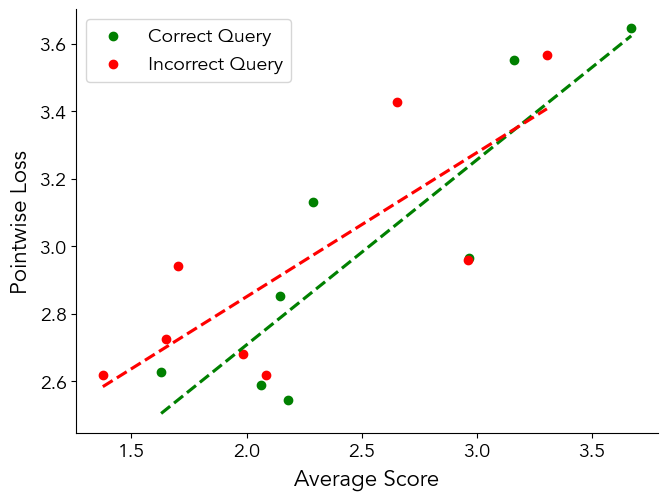

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
data = {
    'Step': [3021, 5035, 7049, 9063, 11077, 13091, 15105, 17119],
    'Training Loss': [0.0908, 0.0644, 0.0598, 0.0457, 0.0442, 0.0432, 0.0313, 0.0303],
    'Correct Avg Loss': [3.645, 2.545, 2.588, 2.966, 3.552, 2.853, 2.626, 3.130],
    'Correct Avg Logit': [3.669, 2.178, 2.062, 2.966, 3.160, 2.143, 1.629, 2.286],
    'Incorrect Loss': [3.566, 2.617, 2.681, 2.960, 3.427, 2.724, 2.617, 2.940],
    'Incorrect Avg Logit': [3.303, 2.083, 1.986, 2.960, 2.651, 1.651, 1.376, 1.703],
    'Validation Avg Loss': [3.584, 2.600, 2.658, 2.961, 3.458, 2.754, 2.619, 2.984],
    'Recall': [0.2346, 0.2298, 0.2451, 0.2259, 0.2519, 0.2403, 0.2490, 0.2346]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(7.5, 5.5))

# Scatter plot for correct documents
plt.scatter(df['Correct Avg Logit'], df['Correct Avg Loss'], color='green', label='Correct Query')

# Scatter plot for incorrect documents
plt.scatter(df['Incorrect Avg Logit'], df['Incorrect Loss'], color='red', label='Incorrect Query')


# Regression plot for correct documents
sns.regplot(x=df['Correct Avg Logit'], y=df['Correct Avg Loss'], scatter=False, color='green', line_kws={'linestyle': '--'}, ci = None)

# Regression plot for incorrect documents
sns.regplot(x=df['Incorrect Avg Logit'], y=df['Incorrect Loss'], scatter=False, color='red', line_kws={'linestyle': '--'}, ci = None)

# Adding labels and title
plt.xlabel('Average Score')
plt.ylabel('Pointwise Loss')
# plt.title('Avg Loss vs Avg Logit')
plt.legend()
sns.despine()

plt.savefig("images/loss_vs_logit.png", dpi=600)

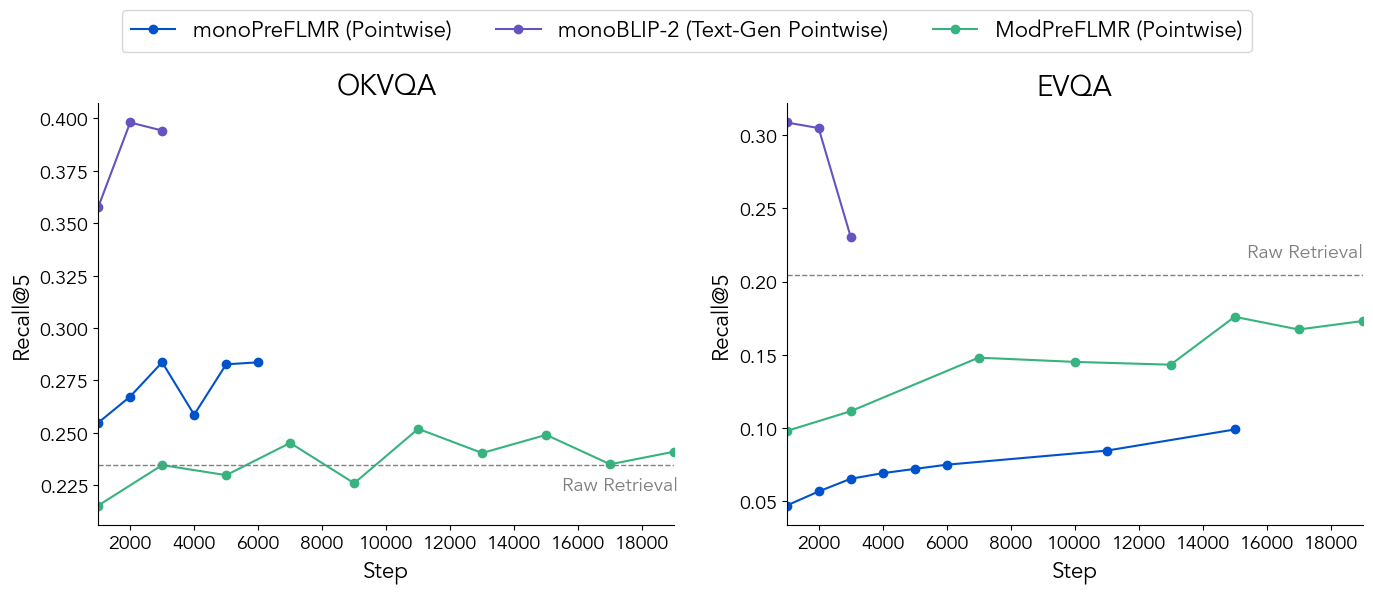

In [63]:
import matplotlib.pyplot as plt

# Data for first plot
data1 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [1000, 2000, 3000, 4000, 5000, 6000],
        "Performance": [0.254807681, 0.267307699, 0.283653855, 0.258653849, 0.282692313, 0.283653855]
    },
    "monoBLIP-2 (Text-Gen Pointwise)": {
        "Step": [1000, 2000, 3000],
        "Performance": [0.3576, 0.398076922, 0.394230783]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000],
        "Performance": [0.2153, 0.234615386, 0.22980769, 0.245192304, 0.225961536, 0.251923084, 0.240384609, 0.249038458, 0.235, 0.241029]
    }
}

# Data for second plot
data2 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [1000, 2000, 3000, 4000, 5000, 6000, 11000, 15000],
        "Performance": [0.047115386, 0.05673077, 0.065384619, 0.069230773, 0.072115384, 0.075000003, 0.084615387, 0.099038459]
    },
    "monoBLIP-2 (Text-Gen Pointwise)": {
        "Step": [1000, 2000, 3000],
        "Performance": [0.3086, 0.304807693, 0.230769232]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 7000, 10000, 13000, 15000, 17000, 19000],
        "Performance": [0.0980, 0.1115, 0.148076922, 0.14519231, 0.143269226, 0.175961539, 0.16730769, 0.173076928]
    }
}

# Define colors
COLOURS = {
    "monoPreFLMR (Pointwise)": "#0052CC",
    "monoBLIP-2 (Text-Gen Pointwise)": "#6554C0",
    "ModPreFLMR (Pointwise)": "#36B37E",
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot first set of data
for model, values in data1.items():
    axes[0].plot(values["Step"], values["Performance"], marker='o', label=model, color=COLOURS[model])
axes[0].set_xlabel('Step', fontsize=16)
axes[0].set_ylabel('Recall@5', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].grid(False)
axes[0].set_title('OKVQA', fontsize=20)
axes[0].set_xlim(1000, 19000)

# Add grey dotted line for Raw Retrieval for OKVQA and label it
axes[0].axhline(y=0.2346, color='grey', linestyle='--', linewidth=1, label='Raw Retrieval')
axes[0].text(15500, 0.225, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')


# Plot second set of data
for model, values in data2.items():
    axes[1].plot(values["Step"], values["Performance"], marker='o', label=model, color=COLOURS[model])
axes[1].set_xlabel('Step', fontsize=16)
axes[1].set_ylabel('Recall@5', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].grid(False)
axes[1].set_title('EVQA', fontsize=20)
axes[1].set_xlim(1000, 19000)

# Add grey dotted line for Raw Retrieval for EVQA and label it
axes[1].axhline(y=0.2048, color='grey', linestyle='--', linewidth=1, label='Raw Retrieval')
axes[1].text(15400, 0.22, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')


# Add a single legend for both plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:-1], labels[:-1], loc='upper center', ncol=3, fontsize=16, title_fontsize=18)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
sns.despine()
plt.savefig("images/stepvsrecall.png", dpi=600)


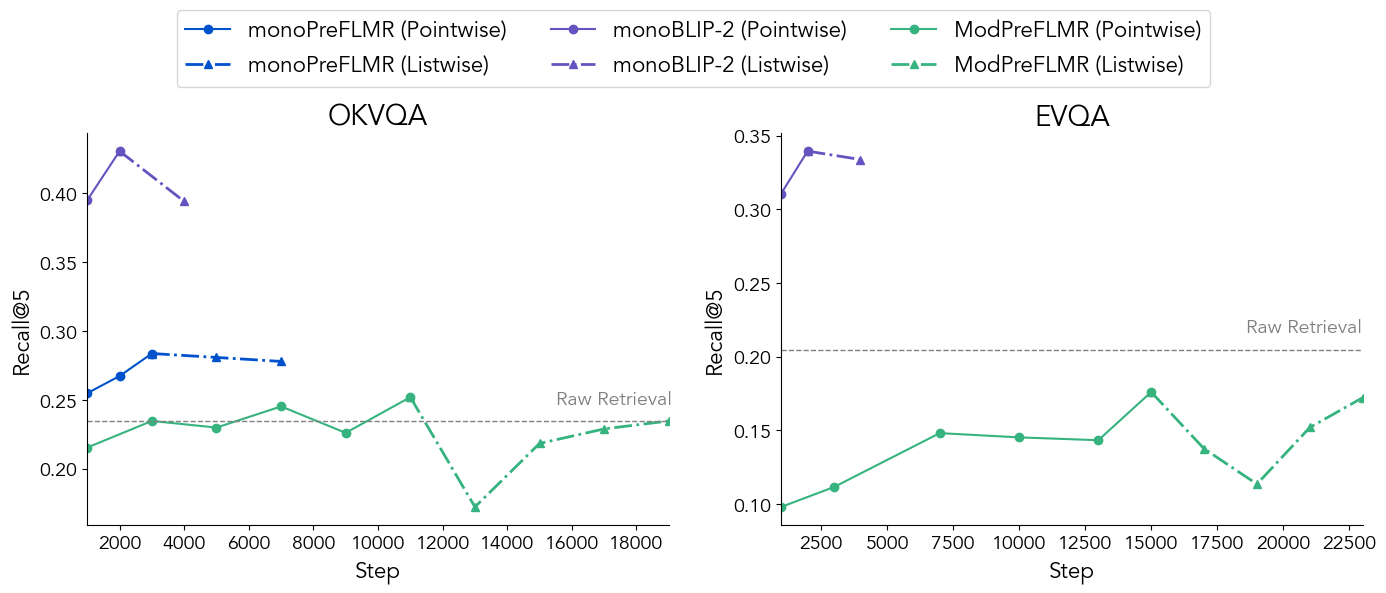

In [5]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Define colors
COLOURS = {
    "monoPreFLMR": "#0052CC",
    "ModPreFLMR": "#36B37E",
    "monoBLIP-2": "#6554C0",
}

data1 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [1000, 2000, 3000],
        "Performance": [0.254807681, 0.267307699, 0.283653855]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.39519, 0.4308]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 5000, 7000, 9000, 11000],
        "Performance": [0.2153, 0.234615386, 0.22980769, 0.245192304, 0.225961536, 0.251923084]
    }
}

data2 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.31057, 0.3394]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 7000, 10000, 13000, 15000],
        "Performance": [0.0980, 0.1115, 0.148076922, 0.14519231, 0.143269226, 0.175961539]
    }
}

data1_neg_sample_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [2000, 4000],
        "Performance": [0.2808, 0.2779]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.394230783]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.172115386, 0.218269229, 0.228846148, 0.234615386]
    }
}

data2_neg_sample_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.3337]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.1375, 0.1135, 0.1519, 0.1721]
    }
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
color_map = {}
# Plot first set of data and extend with dotted lines
for model, values in data1.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[0].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    color_map[model_name] = color
    if model in data1_neg_sample_extend:
        last_step = values["Step"][-1]
        last_performance = values["Performance"][-1]
        ext_steps = [last_step + step for step in data1_neg_sample_extend[model]["Step"]]
        ext_performances = [last_performance] + data1_neg_sample_extend[model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[0].plot(combined_steps, ext_performances, marker='^', linestyle='-.', linewidth=2, color=color)

axes[0].set_xlabel('Step', fontsize=16)
axes[0].set_ylabel('Recall@5', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].grid(False)
axes[0].set_title('OKVQA', fontsize=20)
axes[0].set_xlim(1000, 19000)
# Add grey dotted line for Raw Retrieval for OKVQA and label it
raw_retrieval_line_okvqa = axes[0].axhline(y=0.2346, color='grey', linestyle='--', linewidth=1)
axes[0].text(15500, 0.25, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Plot second set of data and extend with dotted lines
for model, values in data2.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[1].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    if model in data2_neg_sample_extend:
        try:
            last_step = values["Step"][-1]
            last_performance = values["Performance"][-1]
            ext_steps = [last_step + step for step in data2_neg_sample_extend[model]["Step"]]
            ext_performances = [last_performance] + data2_neg_sample_extend[model]["Performance"]
            combined_steps = [last_step] + ext_steps
            axes[1].plot(combined_steps, ext_performances, marker='^', linestyle='-.', linewidth=2, color=color)
        except:
            pass

axes[1].set_xlabel('Step', fontsize=16)
axes[1].set_ylabel('Recall@5', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].grid(False)
axes[1].set_title('EVQA', fontsize=20)
axes[1].set_xlim(1000, 23000)
# Add grey dotted line for Raw Retrieval for EVQA and label it
raw_retrieval_line_evqa = axes[1].axhline(y=0.2048, color='grey', linestyle='--', linewidth=1)
axes[1].text(18600, 0.22, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Add a single legend for both plots with manual entries for Retrieved Extend
pointwise_handles = [
    mlines.Line2D([], [], color=color_map['monoPreFLMR'], marker='o', linestyle='-', label='monoPreFLMR (Pointwise)'),
    mlines.Line2D([], [], color=color_map['monoPreFLMR'], marker='^', linestyle='-.', linewidth=2, label='monoPreFLMR (Listwise)'),
    mlines.Line2D([], [], color=color_map['monoBLIP-2'], marker='o', linestyle='-', label='monoBLIP-2 (Pointwise)'),
    mlines.Line2D([], [], color=color_map['monoBLIP-2'], marker='^', linestyle='-.', linewidth=2, label='monoBLIP-2 (Listwise)'),
    mlines.Line2D([], [], color=color_map['ModPreFLMR'], marker='o', linestyle='-', label='ModPreFLMR (Pointwise)'),
    mlines.Line2D([], [], color=color_map['ModPreFLMR'], marker='^', linestyle='-.', linewidth=2, label='ModPreFLMR (Listwise)')
]
fig.legend(handles=pointwise_handles , loc='upper center', ncol=3,  fontsize=16, title_fontsize=18)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.85])
sns.despine()
plt.savefig("images/listwiserecallvsloss.png", dpi=600)


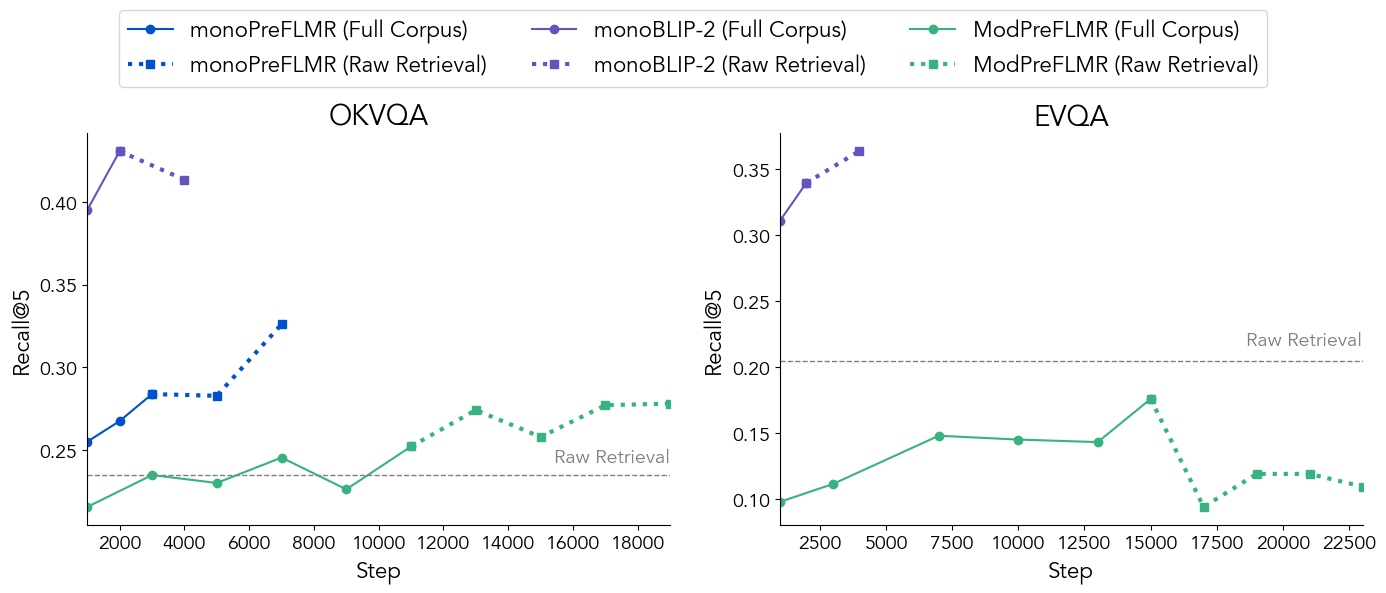

In [4]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Define colors
COLOURS = {
    "monoPreFLMR": "#0052CC",
    "ModPreFLMR": "#36B37E",
    "monoBLIP-2": "#6554C0",
}

data1 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [1000, 2000, 3000],
        "Performance": [0.254807681, 0.267307699, 0.283653855]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.39519, 0.4308]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 5000, 7000, 9000, 11000],
        "Performance": [0.2153, 0.234615386, 0.22980769, 0.245192304, 0.225961536, 0.251923084]
    }
}

data2 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.31057, 0.3394]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 7000, 10000, 13000, 15000],
        "Performance": [0.098, 0.1115, 0.148076922, 0.14519231, 0.143269226, 0.175961539]
    }
}

data1_retrieved_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [2000, 4000],
        "Performance": [0.2826, 0.3259]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.4135]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.274, 0.2577, 0.2769, 0.2779]
    }
}

data2_retrieved_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.3635]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.0942, 0.1192, 0.1192, 0.1096]
    }
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot first set of data and extend with dotted lines
for model, values in data1.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[0].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    if model in data1_retrieved_extend:
        last_step = values["Step"][-1]
        last_performance = values["Performance"][-1]
        ext_steps = [last_step + step for step in data1_retrieved_extend[model]["Step"]]
        ext_performances = [last_performance] + data1_retrieved_extend[model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[0].plot(combined_steps, ext_performances, marker='s', linestyle=':', linewidth=3, color=color)

axes[0].set_xlabel('Step', fontsize=16)
axes[0].set_ylabel('Recall@5', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].grid(False)
axes[0].set_title('OKVQA', fontsize=20)
axes[0].set_xlim(1000, 19000)
# Add grey dotted line for Raw Retrieval for OKVQA and label it
raw_retrieval_line_okvqa = axes[0].axhline(y=0.2346, color='grey', linestyle='--', linewidth=1)
axes[0].text(15400, 0.245, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Plot second set of data and extend with dotted lines
for model, values in data2.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[1].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    if model in data2_retrieved_extend:
        try:
            last_step = values["Step"][-1]
            last_performance = values["Performance"][-1]
            ext_steps = [last_step + step for step in data2_retrieved_extend[model]["Step"]]
            ext_performances = [last_performance] + data2_retrieved_extend[model]["Performance"]
            combined_steps = [last_step] + ext_steps
            axes[1].plot(combined_steps, ext_performances, marker='s', linestyle=':', linewidth=3, color=color)
        except:
            pass

axes[1].set_xlabel('Step', fontsize=16)
axes[1].set_ylabel('Recall@5', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].grid(False)
axes[1].set_title('EVQA', fontsize=20)
axes[1].set_xlim(1000, 23000)
# Add grey dotted line for Raw Retrieval for EVQA and label it
raw_retrieval_line_evqa = axes[1].axhline(y=0.2048, color='grey', linestyle='--', linewidth=1)
axes[1].text(18600, 0.22, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Add a single legend for both plots with manual entries for Retrieved Extend
pointwise_handles = [
    mlines.Line2D([], [], color=COLOURS['monoPreFLMR'], marker='o', linestyle='-', label='monoPreFLMR (Full Corpus)'),
    mlines.Line2D([], [], color=COLOURS['monoPreFLMR'], marker='s', linestyle=':', linewidth=3, label='monoPreFLMR (Raw Retrieval)'),
    mlines.Line2D([], [], color=COLOURS['monoBLIP-2'], marker='o', linestyle='-', label='monoBLIP-2 (Full Corpus)'),
    mlines.Line2D([], [], color=COLOURS['monoBLIP-2'], marker='s', linestyle=':', linewidth=3, label='monoBLIP-2 (Raw Retrieval)'),
    mlines.Line2D([], [], color=COLOURS['ModPreFLMR'], marker='o', linestyle='-', label='ModPreFLMR (Full Corpus)'),
    mlines.Line2D([], [], color=COLOURS['ModPreFLMR'], marker='s', linestyle=':', linewidth=3, label='ModPreFLMR (Raw Retrieval)')
]

raw_retrieval_handle = [mlines.Line2D([], [], color='grey', linestyle='--', label='Raw Retrieval')]

fig.legend(handles=pointwise_handles, loc='upper center', ncol=3, fontsize=16, title_fontsize=18)
# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.85])
sns.despine()
plt.savefig("images/rawretrieverecallvsloss.png", dpi=600)

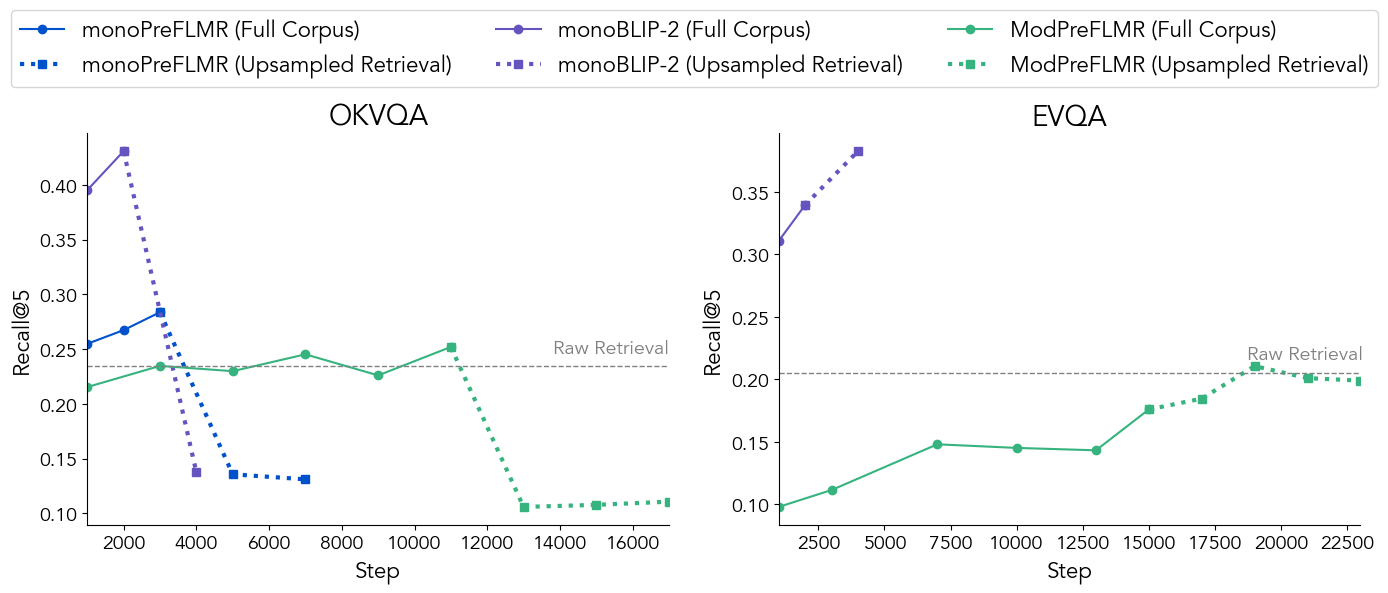

In [83]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Define colors
COLOURS = {
    "monoPreFLMR": "#0052CC",
    "ModPreFLMR": "#36B37E",
    "monoBLIP-2": "#6554C0",
}

data1 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [1000, 2000, 3000],
        "Performance": [0.254807681, 0.267307699, 0.283653855]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.39519, 0.4308]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 5000, 7000, 9000, 11000],
        "Performance": [0.2153, 0.234615386, 0.22980769, 0.245192304, 0.225961536, 0.251923084]
    }
}

data2 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.31057, 0.3394]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 7000, 10000, 13000, 15000],
        "Performance": [0.098, 0.1115, 0.148076922, 0.14519231, 0.143269226, 0.175961539]
    }
}

data1_retrieved_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [2000, 4000],
        "Performance": [0.1356, 0.1310]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.1375]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000],
        "Performance": [0.1058, 0.1077, 0.1106]
    }
}

data2_retrieved_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.3825]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.1846, 0.2106, 0.201, 0.199]
    }
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot first set of data and extend with dotted lines
for model, values in data1.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[0].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    if model in data1_retrieved_extend:
        last_step = values["Step"][-1]
        last_performance = values["Performance"][-1]
        ext_steps = [last_step + step for step in data1_retrieved_extend[model]["Step"]]
        ext_performances = [last_performance] + data1_retrieved_extend[model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[0].plot(combined_steps, ext_performances, marker='s', linestyle=':', linewidth=3, color=color)

axes[0].set_xlabel('Step', fontsize=16)
axes[0].set_ylabel('Recall@5', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].grid(False)
axes[0].set_title('OKVQA', fontsize=20)
axes[0].set_xlim(1000, 17000)
# Add grey dotted line for Raw Retrieval for OKVQA and label it
raw_retrieval_line_okvqa = axes[0].axhline(y=0.2346, color='grey', linestyle='--', linewidth=1)
axes[0].text(13800, 0.25, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Plot second set of data and extend with dotted lines
for model, values in data2.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[1].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    if model in data2_retrieved_extend:
        try:
            last_step = values["Step"][-1]
            last_performance = values["Performance"][-1]
            ext_steps = [last_step + step for step in data2_retrieved_extend[model]["Step"]]
            ext_performances = [last_performance] + data2_retrieved_extend[model]["Performance"]
            combined_steps = [last_step] + ext_steps
            axes[1].plot(combined_steps, ext_performances, marker='s', linestyle=':', linewidth=3, color=color)
        except:
            pass

axes[1].set_xlabel('Step', fontsize=16)
axes[1].set_ylabel('Recall@5', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].grid(False)
axes[1].set_title('EVQA', fontsize=20)
axes[1].set_xlim(1000, 23000)
# Add grey dotted line for Raw Retrieval for EVQA and label it
raw_retrieval_line_evqa = axes[1].axhline(y=0.2048, color='grey', linestyle='--', linewidth=1)
axes[1].text(18700, 0.22, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Add a single legend for both plots with manual entries for Retrieved Extend
pointwise_handles = [
    mlines.Line2D([], [], color=COLOURS['monoPreFLMR'], marker='o', linestyle='-', label='monoPreFLMR (Full Corpus)'),
    mlines.Line2D([], [], color=COLOURS['monoPreFLMR'], marker='s', linestyle=':', linewidth=3, label='monoPreFLMR (Upsampled Retrieval)'),
    mlines.Line2D([], [], color=COLOURS['monoBLIP-2'], marker='o', linestyle='-', label='monoBLIP-2 (Full Corpus)'),
    mlines.Line2D([], [], color=COLOURS['monoBLIP-2'], marker='s', linestyle=':', linewidth=3, label='monoBLIP-2 (Upsampled Retrieval)'),
    mlines.Line2D([], [], color=COLOURS['ModPreFLMR'], marker='o', linestyle='-', label='ModPreFLMR (Full Corpus)'),
    mlines.Line2D([], [], color=COLOURS['ModPreFLMR'], marker='s', linestyle=':', linewidth=3, label='ModPreFLMR (Upsampled Retrieval)')
]

fig.legend(handles=pointwise_handles, loc='upper center', ncol=3, fontsize=16, title_fontsize=18)
# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.85])
sns.despine()
plt.savefig("images/sampleretrieverecallvsloss.png", dpi=600)


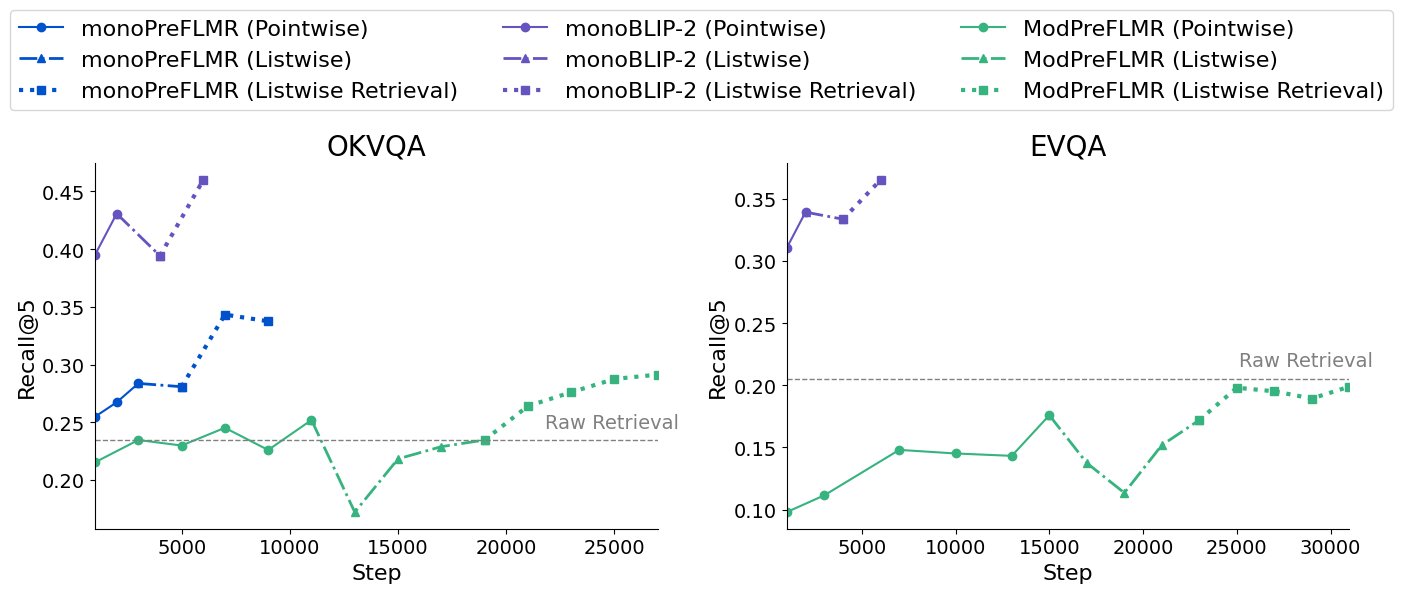

In [10]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Define colors
COLOURS = {
    "monoPreFLMR": "#0052CC",
    "ModPreFLMR": "#36B37E",
    "monoBLIP-2": "#6554C0",
}

data1 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [1000, 2000, 3000],
        "Performance": [0.254807681, 0.267307699, 0.283653855]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.39519, 0.4308]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 5000, 7000, 9000, 11000],
        "Performance": [0.2153, 0.234615386, 0.22980769, 0.245192304, 0.225961536, 0.251923084]
    }
}

data2 = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [1000, 2000],
        "Performance": [0.31057, 0.3394]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [1000, 3000, 7000, 10000, 13000, 15000],
        "Performance": [0.0980, 0.1115, 0.148076922, 0.14519231, 0.143269226, 0.175961539]
    }
}

data1_neg_sample_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [2000],
        "Performance": [0.2808]
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.394230783]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.172115386, 0.218269229, 0.228846148, 0.234615386]
    }
}

data2_neg_sample_extend = {
    "monoPreFLMR (Pointwise)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Pointwise)": {
        "Step": [2000],
        "Performance": [0.3337]
    },
    "ModPreFLMR (Pointwise)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.1375, 0.1135, 0.1519, 0.1721]
    }
}

data1_retrieved_extend = {
    "monoPreFLMR (Retrieved)": {
        "Step": [2000, 4000],
        "Performance": [0.3433, 0.3375]
    },
    "monoBLIP-2 (Retrieved)": {
        "Step": [2000],
        "Performance": [0.46]
    },
    "ModPreFLMR (Retrieved)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.264, 0.276, 0.2875, 0.2913]
    }
}

data2_retrieved_extend = {
    "monoPreFLMR (Retrieved)": {
        "Step": [],
        "Performance": []
    },
    "monoBLIP-2 (Retrieved)": {
        "Step": [2000],
        "Performance": [0.3653]
    },
    "ModPreFLMR (Retrieved)": {
        "Step": [2000, 4000, 6000, 8000],
        "Performance": [0.1981, 0.1952, 0.1894, 0.199]
    }
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
color_map = {}

# Plot first set of data and extend with dotted lines
for model, values in data1.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[0].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)
    color_map[model.split(' ')[0]] = color 

    last_step = values["Step"][-1] if values["Step"] else None
    last_performance = values["Performance"][-1] if values["Performance"] else None

    if model in data1_neg_sample_extend and last_step is not None and last_performance is not None:
        ext_steps = [last_step + step for step in data1_neg_sample_extend[model]["Step"]]
        ext_performances = [last_performance] + data1_neg_sample_extend[model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[0].plot(combined_steps, ext_performances, marker='^', linestyle='-.', linewidth=2, color=color)
        last_step = combined_steps[-1]
        last_performance = ext_performances[-1]

    retrieved_model = model.replace("Pointwise", "Retrieved")
    if retrieved_model in data1_retrieved_extend and last_step is not None and last_performance is not None:
        ext_steps = [last_step + step for step in data1_retrieved_extend[retrieved_model]["Step"]]
        ext_performances = [last_performance] + data1_retrieved_extend[retrieved_model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[0].plot(combined_steps, ext_performances, marker='s', linestyle=':', linewidth=3, color=color)

axes[0].set_xlabel('Step', fontsize=16)
axes[0].set_ylabel('Recall@5', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].grid(False)
axes[0].set_title('OKVQA', fontsize=20)
axes[0].set_xlim(1000, 27000)
raw_retrieval_line_okvqa = axes[0].axhline(y=0.2346, color='grey', linestyle='--', linewidth=1)
axes[0].text(21800, 0.25, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Plot second set of data and extend with dotted lines
for model, values in data2.items():
    model_name = model.split(' ')[0]
    color = COLOURS[model_name]
    line, = axes[1].plot(values["Step"], values["Performance"], marker='o', label=model, color=color)

    last_step = values["Step"][-1] if values["Step"] else None
    last_performance = values["Performance"][-1] if values["Performance"] else None

    if model in data2_neg_sample_extend and last_step is not None and last_performance is not None:
        ext_steps = [last_step + step for step in data2_neg_sample_extend[model]["Step"]]
        ext_performances = [last_performance] + data2_neg_sample_extend[model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[1].plot(combined_steps, ext_performances, marker='^', linestyle='-.', linewidth=2, color=color)
        last_step = combined_steps[-1]
        last_performance = ext_performances[-1]

    retrieved_model = model.replace("Pointwise", "Retrieved")
    if retrieved_model in data2_retrieved_extend and last_step is not None and last_performance is not None:
        ext_steps = [last_step + step for step in data2_retrieved_extend[retrieved_model]["Step"]]
        ext_performances = [last_performance] + data2_retrieved_extend[retrieved_model]["Performance"]
        combined_steps = [last_step] + ext_steps
        axes[1].plot(combined_steps, ext_performances, marker='s', linestyle=':', linewidth=3, color=color)

axes[1].set_xlabel('Step', fontsize=16)
axes[1].set_ylabel('Recall@5', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].grid(False)
axes[1].set_title('EVQA', fontsize=20)
axes[1].set_xlim(1000, 31000)
raw_retrieval_line_evqa = axes[1].axhline(y=0.2048, color='grey', linestyle='--', linewidth=1)
axes[1].text(25100, 0.22, 'Raw Retrieval', color='grey', fontsize=14, verticalalignment='center')

# Add a single legend for both plots with manual entries for Retrieved Extend
pointwise_handles = [
    # Pointwise
    mlines.Line2D([], [], color=color_map['monoPreFLMR'], marker='o', linestyle='-', label='monoPreFLMR (Pointwise)'),
    mlines.Line2D([], [], color=color_map['monoPreFLMR'], marker='^', linestyle='-.', linewidth=2, label='monoPreFLMR (Listwise)'), 
    mlines.Line2D([], [], color=color_map['monoPreFLMR'], marker='s', linestyle=':', linewidth=3, label='monoPreFLMR (Listwise Retrieval)'), 
      
    mlines.Line2D([], [], color=color_map['monoBLIP-2'], marker='o', linestyle='-', label='monoBLIP-2 (Pointwise)'),
    mlines.Line2D([], [], color=color_map['monoBLIP-2'], marker='^', linestyle='-.', linewidth=2, label='monoBLIP-2 (Listwise)'),
    mlines.Line2D([], [], color=color_map['monoBLIP-2'], marker='s', linestyle=':', linewidth=3, label='monoBLIP-2 (Listwise Retrieval)'),
    mlines.Line2D([], [], color=color_map['ModPreFLMR'], marker='o', linestyle='-', label='ModPreFLMR (Pointwise)'),
    
    # # Raw Retrieval
    # mlines.Line2D([], [], color='grey', linestyle='--', label='Raw Retrieval'),
    
    # Listwise with different markers and line styles for higher distinction
    
    
    mlines.Line2D([], [], color=color_map['ModPreFLMR'], marker='^', linestyle='-.', linewidth=2, label='ModPreFLMR (Listwise)'),
    
    # Listwise Retrieval with different markers and line styles for highest distinction
    
    
    mlines.Line2D([], [], color=color_map['ModPreFLMR'], marker='s', linestyle=':', linewidth=3, label='ModPreFLMR (Listwise Retrieval)')
]

fig.legend(handles=pointwise_handles, loc='upper center', ncol=3, fontsize=16, title_fontsize=18)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.8])
sns.despine()
plt.savefig("images/listwiseretrieverecallvsloss.png", dpi=600)


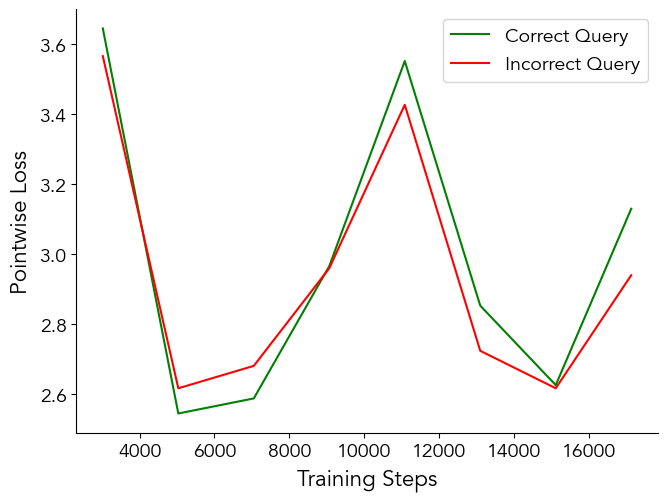

In [99]:
import matplotlib.pyplot as plt

# Data from the table
steps = [3021, 5035, 7049, 9063, 11077, 13091, 15105, 17119]
correct_avg_loss = [3.645, 2.545, 2.588, 2.966, 3.552, 2.853, 2.626, 3.130]
incorrect_avg_loss = [3.566, 2.617, 2.681, 2.960, 3.427, 2.724, 2.617, 2.940]

# Plotting
plt.figure(figsize=(7.5, 5.5))
plt.plot(steps, correct_avg_loss, 'g-', label='Correct Query')  # Green line
plt.plot(steps, incorrect_avg_loss, 'r-', label='Incorrect Query')  # Red line

# Adding titles and labels
plt.xlabel('Training Steps')
plt.ylabel('Pointwise Loss')

# Adding legend
plt.legend()
sns.despine()
# Show plot
plt.savefig("images/correctincorrectlossvsstep.png", dpi=600)



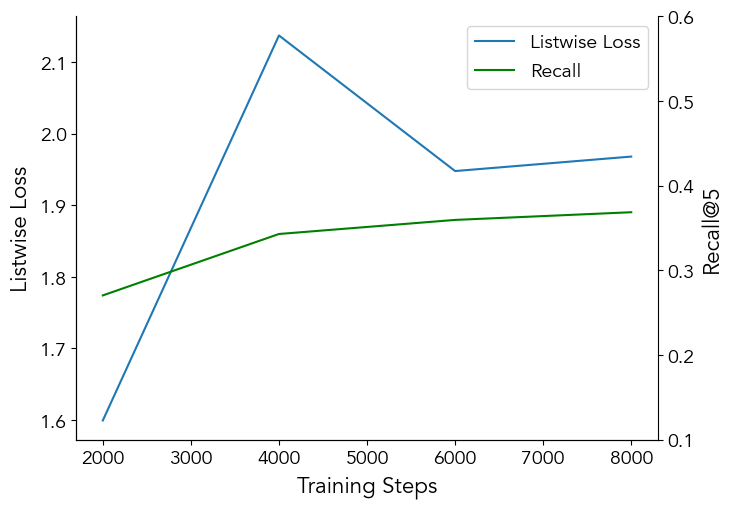

In [97]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the original request
data = {
    'Steps': [2000, 4000, 6000, 8000],
    'Overall Loss': [1.5993214245530532, 2.137003690915169, 1.947664068557868, 1.967873851817137],
    'Recall': [0.270392749244713, 0.3429003021148036, 0.3595166163141994, 0.3685800604229607]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(7.5, 5.5))

# Plot the overall loss on the primary y-axis
sns.lineplot(data=df, x='Steps', y='Overall Loss', ax=ax1, label='Listwise Loss')

# Set up the secondary axis for Recall
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Steps', y='Recall', ax=ax2, color='green', label='Recall')

# Set labels and title
ax1.set_xlabel('Training Steps')
ax1.set_ylabel('Listwise Loss')
ax2.set_ylabel('Recall@5')

# Customize the secondary y-axis for Recall
ax2.set_ylim(0.1, 0.6)

# Combine handles and labels from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Create a single legend for both lines
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Remove the legend from the second axis to avoid duplication
ax2.get_legend().remove()

# Customizing the plot
sns.despine(ax=ax1, top=True, right=False)  # Remove the top spine only, keep the right spine for the secondary axis
sns.despine(ax=ax2, top=True, right=False)  # Remove the top spine only for the secondary axis

# Remove the top border from both axes
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Remove the right border of the primary axis but keep it for the secondary axis
ax1.spines['right'].set_visible(False)

ax1.grid(False)  # Disable the grid

# Save the plot with higher quality
plt.savefig("images/listwise_val_vs_recall.png", dpi=600)


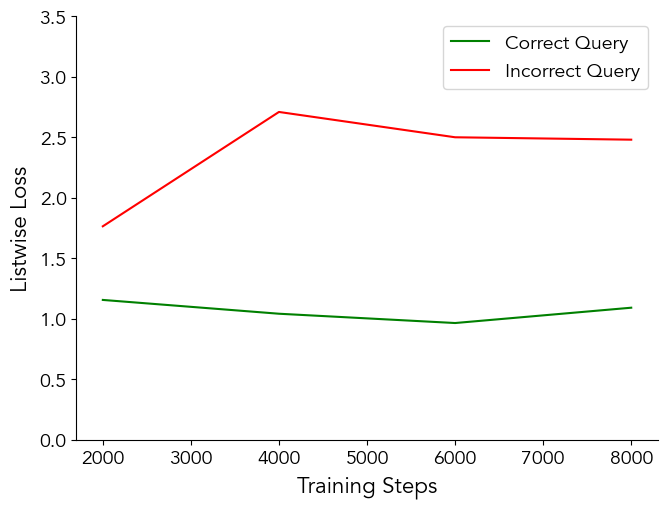

In [7]:
import matplotlib.pyplot as plt

# Data
steps = [2000, 4000, 6000, 8000]
correct_losses = [1.1552975040046705, 1.0412505034957331, 0.9644174993237004, 1.091046488102039]
incorrect_losses = [1.7638768733691206, 2.70881052664899, 2.4995807748732735, 2.479706092837433]

# Plotting
plt.figure(figsize=(7.5, 5.5))
plt.plot(steps, correct_losses, 'g-', label='Correct Query')  # Green line
plt.plot(steps, incorrect_losses, 'r-', label='Incorrect Query')  # Red line

# Adding titles and labels
plt.xlabel('Training Steps')
plt.ylabel('Listwise Loss')

plt.ylim(0, 3.5)
# Adding legend
plt.legend()

sns.despine()
# Show plot
plt.savefig("images/listwisecorrectincorrectlossvsstep.png", dpi=600)


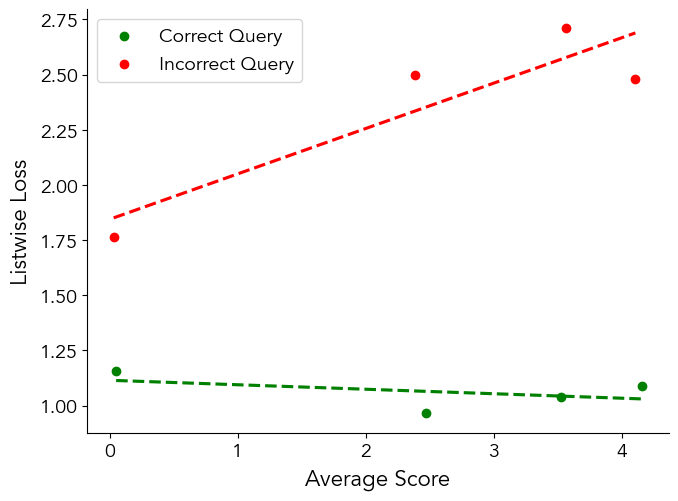

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
data = {
    'Correct Scores Mean': [0.050603380073434234, 3.5259563884955507, 2.4713967502915435, 4.158048609468597],
    'Correct Losses': [1.1552975040046705, 1.0412505034957331, 0.9644174993237004, 1.091046488102039],
    'Incorrect Scores Mean': [0.03157646107338909, 3.5663855548398677, 2.385231855631463, 4.1054462512365975],
    'Incorrect Losses': [1.7638768733691206, 2.70881052664899, 2.4995807748732735, 2.479706092837433]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(7.5, 5.5))

# Scatter plot for correct documents
plt.scatter(df['Correct Scores Mean'], df['Correct Losses'], color='green', label='Correct Query')

# Scatter plot for incorrect documents
plt.scatter(df['Incorrect Scores Mean'], df['Incorrect Losses'], color='red', label='Incorrect Query')

# Regression plot for correct documents
sns.regplot(x=df['Correct Scores Mean'], y=df['Correct Losses'], scatter=False, color='green', line_kws={'linestyle': '--'}, ci=None)

# Regression plot for incorrect documents
sns.regplot(x=df['Incorrect Scores Mean'], y=df['Incorrect Losses'], scatter=False, color='red', line_kws={'linestyle': '--'}, ci=None)

# Adding labels and title
plt.xlabel('Average Score')
plt.ylabel('Listwise Loss')
plt.legend()

# Remove the top and right border of the plot
sns.despine()

# Save the plot
plt.savefig("images/listwise_loss_vs_logit.png", dpi=600)



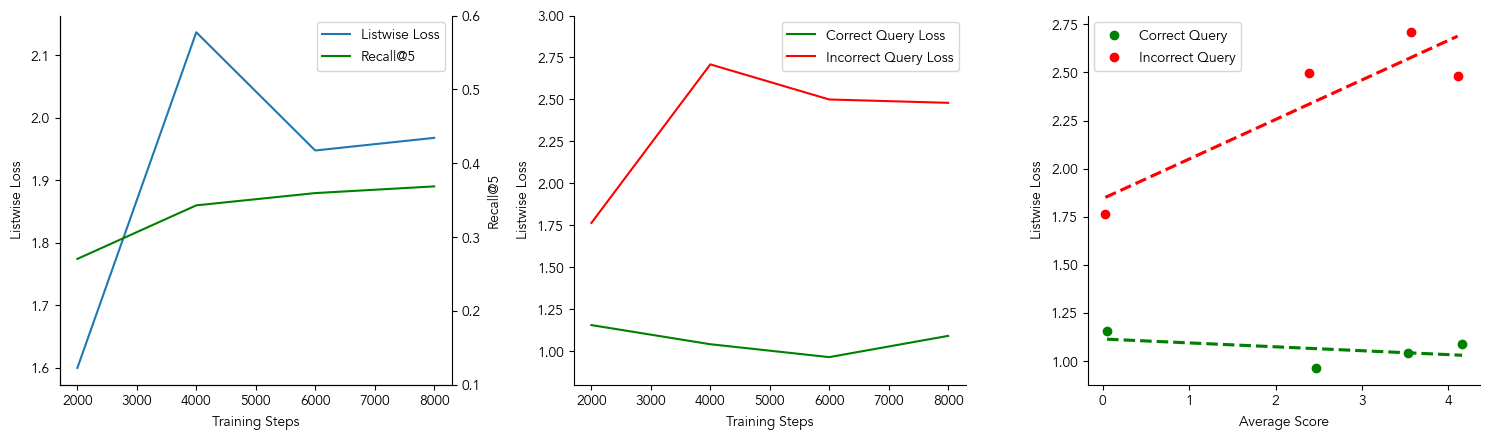

In [25]:
# # Import necessary libraries
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Data for the first plot
# data1 = {
#     'Steps': [2000, 4000, 6000, 8000],
#     'Overall Loss': [1.5993214245530532, 2.137003690915169, 1.947664068557868, 1.967873851817137],
#     'Recall': [0.270392749244713, 0.3429003021148036, 0.3595166163141994, 0.3685800604229607]
# }
# df1 = pd.DataFrame(data1)

# # Data for the second plot
# steps = [2000, 4000, 6000, 8000]
# correct_losses = [1.1552975040046705, 1.0412505034957331, 0.9644174993237004, 1.091046488102039]
# incorrect_losses = [1.7638768733691206, 2.70881052664899, 2.4995807748732735, 2.479706092837433]

# # Data for the third plot
# data2 = {
#     'Correct Scores Mean': [0.050603380073434234, 3.5259563884955507, 2.4713967502915435, 4.158048609468597],
#     'Correct Losses': [1.1552975040046705, 1.0412505034957331, 0.9644174993237004, 1.091046488102039],
#     'Incorrect Scores Mean': [0.03157646107338909, 3.5663855548398677, 2.385231855631463, 4.1054462512365975],
#     'Incorrect Losses': [1.7638768733691206, 2.70881052664899, 2.4995807748732735, 2.479706092837433]
# }
# df2 = pd.DataFrame(data2)

# # Create the figure and axes
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4.5))

# # Plot 1: Overall Loss and Recall vs. Steps
# sns.lineplot(data=df1, x='Steps', y='Overall Loss', ax=ax1, label='Listwise Loss')
# ax4 = ax1.twinx()
# sns.lineplot(data=df1, x='Steps', y='Recall', ax=ax4, color='green', label='Recall@5')
# ax1.set_xlabel('Training Steps')
# ax1.set_ylabel('Listwise Loss')
# ax4.set_ylabel('Recall@5')
# ax4.set_ylim(0.1, 0.6)
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax4.get_legend_handles_labels()
# ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
# ax4.get_legend().remove()
# sns.despine(ax=ax1, top=True, right=False)
# sns.despine(ax=ax4, top=True, right=False)
# ax1.spines['top'].set_visible(False)
# ax4.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.grid(False)

# # Plot 2: Correct Loss vs. Incorrect Loss
# ax2.plot(steps, correct_losses, 'g-', label='Correct Query Loss')
# ax2.plot(steps, incorrect_losses, 'r-', label='Incorrect Query Loss')
# ax2.set_xlabel('Training Steps')
# ax2.set_ylabel('Listwise Loss')
# ax2.set_ylim(0.8, 3)
# ax2.legend()
# sns.despine(ax=ax2)

# # Plot 3: Loss vs. Scores Mean
# ax3.scatter(df2['Correct Scores Mean'], df2['Correct Losses'], color='green', label='Correct Query')
# ax3.scatter(df2['Incorrect Scores Mean'], df2['Incorrect Losses'], color='red', label='Incorrect Query')
# sns.regplot(x=df2['Correct Scores Mean'], y=df2['Correct Losses'], scatter=False, color='green', line_kws={'linestyle': '--'}, ci=None, ax=ax3)
# sns.regplot(x=df2['Incorrect Scores Mean'], y=df2['Incorrect Losses'], scatter=False, color='red', line_kws={'linestyle': '--'}, ci=None, ax=ax3)
# ax3.set_xlabel('Average Score')
# ax3.set_ylabel('Listwise Loss')
# ax3.legend()
# sns.despine(ax=ax3)

# # Adjust layout
# plt.tight_layout()

# # # Save the plot
# plt.savefig("images/listwise_analysis.png", dpi=600)
# plt.show()


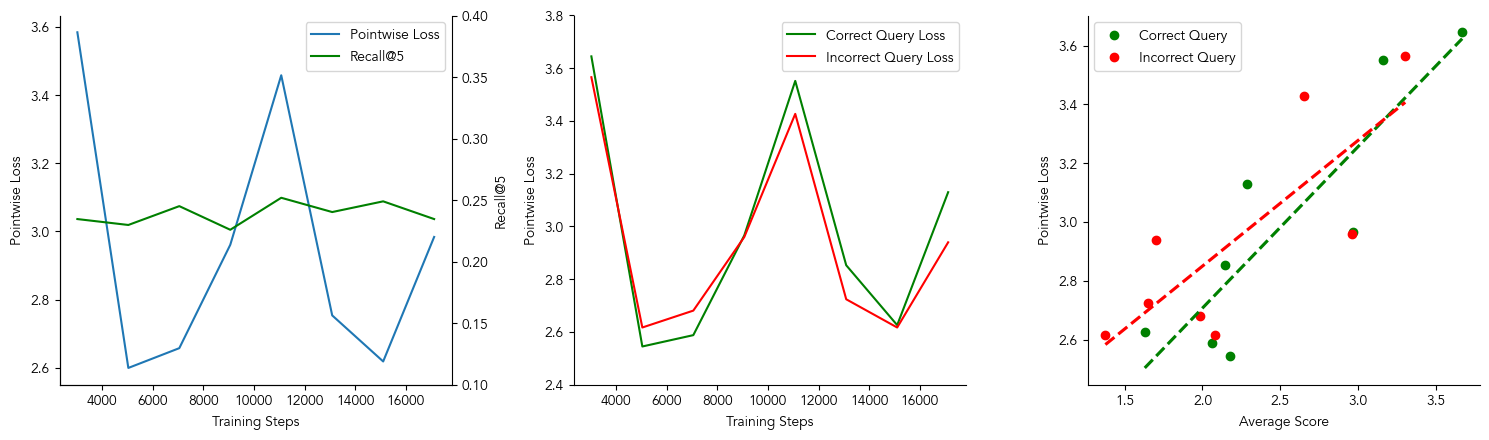

In [26]:
# # Import necessary libraries
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Data for the first plot
# data1 = {
#     'Steps': [3021, 5035, 7049, 9063, 11077, 13091, 15105, 17119],
#     'Training Loss': [0.0908, 0.0644, 0.0598, 0.0457, 0.0442, 0.0432, 0.0313, 0.0303],
#     'Validation Avg Loss': [3.584, 2.600, 2.658, 2.961, 3.458, 2.754, 2.619, 2.984],
#     'Recall': [0.2346, 0.2298, 0.2451, 0.2259, 0.2519, 0.2403, 0.2490, 0.2346]
# }
# df1 = pd.DataFrame(data1)

# # Data for the second plot
# steps2 = [3021, 5035, 7049, 9063, 11077, 13091, 15105, 17119]
# correct_avg_loss = [3.645, 2.545, 2.588, 2.966, 3.552, 2.853, 2.626, 3.130]
# incorrect_avg_loss = [3.566, 2.617, 2.681, 2.960, 3.427, 2.724, 2.617, 2.940]

# # Data for the third plot
# data3 = {
#     'Step': [3021, 5035, 7049, 9063, 11077, 13091, 15105, 17119],
#     'Training Loss': [0.0908, 0.0644, 0.0598, 0.0457, 0.0442, 0.0432, 0.0313, 0.0303],
#     'Correct Avg Loss': [3.645, 2.545, 2.588, 2.966, 3.552, 2.853, 2.626, 3.130],
#     'Correct Avg Logit': [3.669, 2.178, 2.062, 2.966, 3.160, 2.143, 1.629, 2.286],
#     'Incorrect Loss': [3.566, 2.617, 2.681, 2.960, 3.427, 2.724, 2.617, 2.940],
#     'Incorrect Avg Logit': [3.303, 2.083, 1.986, 2.960, 2.651, 1.651, 1.376, 1.703],
#     'Validation Avg Loss': [3.584, 2.600, 2.658, 2.961, 3.458, 2.754, 2.619, 2.984],
#     'Recall': [0.2346, 0.2298, 0.2451, 0.2259, 0.2519, 0.2403, 0.2490, 0.2346]
# }
# df3 = pd.DataFrame(data3)

# # Create the figure and axes
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4.5))

# # Plot 1: Validation Avg Loss and Recall vs. Steps
# sns.lineplot(data=df1, x='Steps', y='Validation Avg Loss', ax=ax1, label='Pointwise Loss')
# ax4 = ax1.twinx()
# sns.lineplot(data=df1, x='Steps', y='Recall', ax=ax4, color='green', label='Recall@5')
# ax1.set_xlabel('Training Steps')
# ax1.set_ylabel('Pointwise Loss')
# ax4.set_ylabel('Recall@5')
# ax4.set_ylim(0.1, 0.4)
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax4.get_legend_handles_labels()
# ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
# ax4.get_legend().remove()
# sns.despine(ax=ax1, top=True, right=False)
# sns.despine(ax=ax4, top=True, right=False)
# ax1.spines['top'].set_visible(False)
# ax4.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.grid(False)

# # Plot 2: Correct Query Loss vs. Incorrect Query Loss
# ax2.plot(steps2, correct_avg_loss, 'g-', label='Correct Query Loss')
# ax2.plot(steps2, incorrect_avg_loss, 'r-', label='Incorrect Query Loss')
# ax2.set_xlabel('Training Steps')
# ax2.set_ylabel('Pointwise Loss')
# ax2.set_ylim(2.4, 3.8)
# ax2.legend()
# sns.despine(ax=ax2)

# # Plot 3: Avg Loss vs. Avg Logit
# ax3.scatter(df3['Correct Avg Logit'], df3['Correct Avg Loss'], color='green', label='Correct Query')
# ax3.scatter(df3['Incorrect Avg Logit'], df3['Incorrect Loss'], color='red', label='Incorrect Query')
# sns.regplot(x=df3['Correct Avg Logit'], y=df3['Correct Avg Loss'], scatter=False, color='green', line_kws={'linestyle': '--'}, ci=None, ax=ax3)
# sns.regplot(x=df3['Incorrect Avg Logit'], y=df3['Incorrect Loss'], scatter=False, color='red', line_kws={'linestyle': '--'}, ci=None, ax=ax3)
# ax3.set_xlabel('Average Score')
# ax3.set_ylabel('Pointwise Loss')
# ax3.legend()
# sns.despine(ax=ax3)

# # Adjust layout
# plt.tight_layout()

# # # Save the plot
# plt.savefig("images/pointwise_analysis.png", dpi=600)
# plt.show()


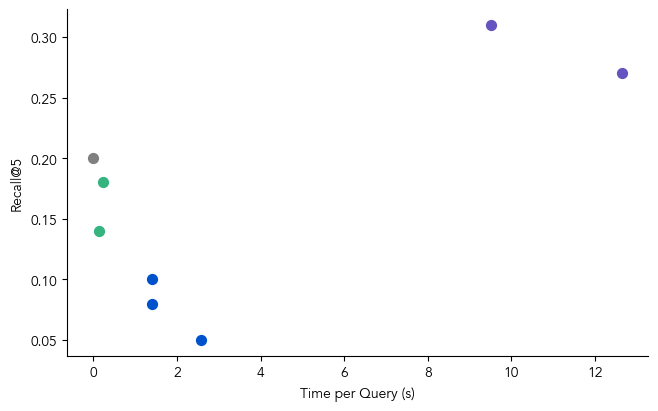

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = [
    "Raw Retrieval", "monoPreFLMR-B (15000 steps)", "monoPreFLMR-B (6000 steps)", 
    "monoPreFLMR-L (6000 steps)", "monoBLIP-2 Flan-T5", "monoBLIP-2 Opt", 
    "ModPreFLMR BERT", "ModPreFLMR IB"
]

recall_5 = [0.20, 0.10, 0.08, 0.05, 0.31, 0.27, 0.18, 0.14]
time_per_query = [0, 1.40, 1.40, 2.58, 9.52, 12.64, 0.24, 0.13]

# Colors for different model categories
COLOURS = {
    "Raw Retrieval": "gray",
    "monoPreFLMR": "#0052CC",
    "monoBLIP-2": "#6554C0",
    "ModPreFLMR": "#36B37E"
}

model_color_map = {
    "Raw Retrieval": COLOURS["Raw Retrieval"],
    "monoPreFLMR-B (15000 steps)": COLOURS["monoPreFLMR"],
    "monoPreFLMR-B (6000 steps)": COLOURS["monoPreFLMR"],
    "monoPreFLMR-L (6000 steps)": COLOURS["monoPreFLMR"],
    "monoBLIP-2 Flan-T5": COLOURS["monoBLIP-2"],
    "monoBLIP-2 Opt": COLOURS["monoBLIP-2"],
    "ModPreFLMR BERT": COLOURS["ModPreFLMR"],
    "ModPreFLMR IB": COLOURS["ModPreFLMR"]
}

# Plotting trade-off between Recall@5 and Latency
fig, ax = plt.subplots(figsize=(7.5, 4.5))
for i, model in enumerate(models):
    if not np.isnan(time_per_query[i]):
        ax.scatter(time_per_query[i], recall_5[i], color=model_color_map[model], s=50)  # s is the marker size

# Removing the plot border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set larger font sizes for the axes labels and tick labels
ax.set_xlabel('Time per Query (s)')
ax.set_ylabel('Recall@5')
ax.tick_params(axis='both', which='major')

plt.savefig("images/evqa_results.png", dpi=600)

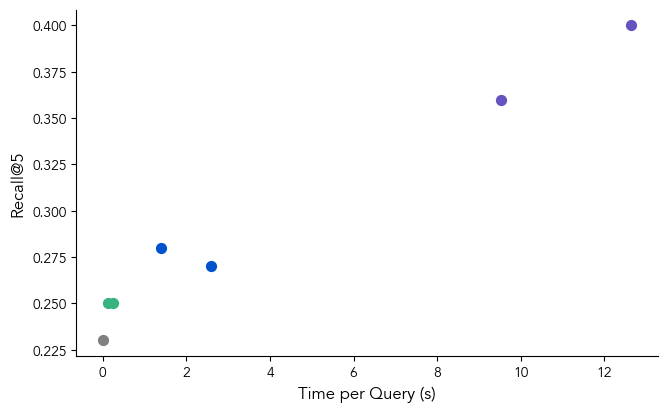

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data from the table
models = [
    "Raw Retrieval", "monoPreFLMR-B", "monoPreFLMR-L", 
    "monoBLIP-2 Flan-T5", "monoBLIP-2 Opt", 
    "ModPreFLMR BERT", "ModPreFLMR IB"
]

recall_5 = [0.23, 0.28, 0.27, 0.36, 0.40, 0.25, 0.25]
time_per_query = [0, 1.40, 2.58, 9.52, 12.64, 0.24, 0.13]

# Colors for different model categories
COLOURS = {
    "Raw Retrieval": "gray",
    "monoPreFLMR": "#0052CC",
    "monoBLIP-2": "#6554C0",
    "ModPreFLMR": "#36B37E"
}

model_color_map = {
    "Raw Retrieval": COLOURS["Raw Retrieval"],
    "monoPreFLMR-B": COLOURS["monoPreFLMR"],
    "monoPreFLMR-L": COLOURS["monoPreFLMR"],
    "monoBLIP-2 Flan-T5": COLOURS["monoBLIP-2"],
    "monoBLIP-2 Opt": COLOURS["monoBLIP-2"],
    "ModPreFLMR BERT": COLOURS["ModPreFLMR"],
    "ModPreFLMR IB": COLOURS["ModPreFLMR"]
}

# Plotting trade-off between Recall@5 and Latency
fig, ax = plt.subplots(figsize=(7.5, 4.5))
for i, model in enumerate(models):
    ax.scatter(time_per_query[i], recall_5[i], color=model_color_map[model], s=50)  # s is the marker size
        
# Removing the plot border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set larger font sizes for the axes labels and tick labels
ax.set_xlabel('Time per Query (s)', fontsize=12)
ax.set_ylabel('Recall@5', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)



plt.savefig("images/okvqa_results.png", dpi=600)


In [37]:
import pandas as pd

# Prepare the data
data = {
    'Dataset': ['OKVQA', 'OKVQA', 'OKVQA', 'EVQA', 'EVQA', 
                'OKVQA', 'OKVQA', 'OKVQA', 'EVQA', 'EVQA'],
    'Reranker': ['monoPreFLMR-B', 'monoBLIP-2 OPT', 'ModPreFLMR IB', 'monoBLIP-2 Flan-T5', 'ModPreFLMR BERT',
                 'monoPreFLMR-B', 'monoBLIP-2 OPT', 'ModPreFLMR IB', 'monoBLIP-2 Flan-T5', 'ModPreFLMR BERT'],
    'Type': ['Full Corpus', 'Full Corpus', 'Full Corpus', 'Full Corpus', 'Full Corpus', 
             'Raw Retrieval', 'Raw Retrieval', 'Raw Retrieval', 'Raw Retrieval', 'Raw Retrieval'],
    'Val Loss': [3.062, 1.78, 3.458, 2.244, 4.686, 
                 0.1018, 0.08, 0.1148, 0.0476, 0.0479],
    'Recall@5': [0.2836, 0.4307, 0.2519, 0.3394, 0.1759, 
                 0.3259, 0.4134, 0.2769, 0.3634, 0.1192]
}

df = pd.DataFrame(data)

# Export to CSV
df.to_csv('data.csv', index=False)
